In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

import astropy
from astropy import stats
import geopy
from geopy import distance
import math
from itertools import combinations

import scipy
from scipy import signal
from scipy import fft

import cycler
from matplotlib import cm

import glob
import figurefirst as fifi


from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Read in all dfs

In [2]:
dates=['Desert, 10.20.20', 'Whittell, 7.7.21', 'David yard, 9.26.21', 'Tahoe, 10.29.21', 'Jaleesa yard, 10.30.21', 'Jaleesa yard, 1.8.22', 'Lemmon, 1.11.22', 'Lemmon, 1.15.22', 'Floris yard, 4.30.22', 'Floris yard, 5.1.22', 'Floris yard, 5.2.22', 'Lemmon, 6.1.22', 'Lemmon, 6.3.22', 'Whittell, 6.7.22', 'Whittell, 6.8.22', 'Tahoe, 6.22.22']

In [5]:
df1=pd.read_hdf('raw_data_for_me/small_10.20.20_maskedgpsdata.hdf')
df2=pd.read_hdf('raw_data_for_me/small_7.7.21_maskedgpsdata.hdf')
df3=pd.read_hdf('raw_data_for_me/small_9.26.21_maskedgpsdata.hdf')
df4=pd.read_hdf('raw_data_for_me/small_10.29.21_maskedgpsdata.hdf')
df5=pd.read_hdf('raw_data_for_me/small_10.30.21_maskedgpsdata.hdf')
df6=pd.read_hdf('raw_data_for_me/small_1.8.22_maskedgpsdata.hdf')
df7=pd.read_hdf('raw_data_for_me/small_1.11.22_maskedgpsdata.hdf')
df8=pd.read_hdf('raw_data_for_me/small_1.15.22_maskedgpsdata.hdf')
df9=pd.read_hdf('raw_data_for_me/small_4.30.22_maskedgpsdata.hdf')
df10=pd.read_hdf('raw_data_for_me/small_5.1.22_maskedgpsdata.hdf')
df11=pd.read_hdf('raw_data_for_me/small_5.2.22_maskedgpsdata.hdf')
df12=pd.read_hdf('raw_data_for_me/small_6.1.22_maskedgpsdata.hdf')
df13=pd.read_hdf('raw_data_for_me/small_6.3.22_maskedgpsdata.hdf')
df14=pd.read_hdf('raw_data_for_me/small_6.7.22_maskedgpsdata.hdf')
df15=pd.read_hdf('raw_data_for_me/small_6.8.22_maskedgpsdata.hdf')
df16=pd.read_hdf('raw_data_for_me/small_6.22.22_maskedgpsdata.hdf')


# Separating dfs into just speed and direction

In [6]:
#only horizontal direction for all sensors in each environment
ddf1=df1[['D_1', 'D_2', 'D_4', 'D_5', 'D_6', 'D_7', 'D_8', 'D_9']]
ddf2=df2[['D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_8', 'D_9']]
ddf3=df3[['D_1', 'D_2', 'D_4', 'D_5', 'D_6', 'D_7']]
ddf4=df4[['D_1', 'D_2', 'D_3', 'D_5', 'D_6', 'D_7']]
ddf5=df5[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7' ]]
ddf6=df6[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7' ]]
ddf7=df7[['D_1', 'D_2', 'D_3', 'D_4','D_5', 'D_6', 'D_7' ]]
ddf8=df8[['D_1', 'D_2', 'D_3', 'D_4','D_5', 'D_6', 'D_7' ]]
ddf9=df9[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_8' ]]
ddf10=df10[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_8' ]]
ddf11=df11[['D_2','D_5', 'D_6', 'D_8' ]]
ddf12=df12[['D_1', 'D_2', 'D_3','D_5', 'D_6', 'D_7', 'D_8' ]]
ddf13=df13[['D_2', 'D_3','D_5', 'D_6', 'D_7', 'D_8' ]]
ddf14=df14[['D_2', 'D_5', 'D_6', 'D_7', 'D_8' ]]
ddf15=df15[['D_2', 'D_5', 'D_6', 'D_7', 'D_8' ]]
ddf16=df16[['D_2', 'D_3', 'D_5', 'D_6', 'D_7', 'D_8' ]]

In [7]:
#if you just want S2
sdf1=df1[['S2_1', 'S2_2', 'S2_4', 'S2_5', 'S2_6', 'S2_7', 'S2_8', 'S2_9']]
sdf2=df2[['S2_1', 'S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_9']]
sdf3=df3[['S2_1', 'S2_2', 'S2_4', 'S2_5', 'S2_6', 'S2_7']]
sdf4=df4[['S2_1', 'S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_7']]
sdf5=df5[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7' ]]
sdf6=df6[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7' ]]
sdf7=df7[['S2_1', 'S2_2', 'S2_3', 'S2_4','S2_5', 'S2_6', 'S2_7' ]]
sdf8=df8[['S2_1', 'S2_2', 'S2_3', 'S2_4','S2_5', 'S2_6', 'S2_7' ]]
sdf9=df9[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_8' ]]
sdf10=df10[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_8' ]]
sdf11=df11[[ 'S2_2','S2_5', 'S2_6', 'S2_8' ]]
sdf12=df12[['S2_1', 'S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf13=df13[['S2_2', 'S2_3','S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf14=df14[['S2_2', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf15=df15[['S2_2', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]
sdf16=df16[['S2_2', 'S2_3', 'S2_5', 'S2_6', 'S2_7', 'S2_8' ]]

# Functions

In [8]:
#split speed and difference dfs so that you can find averages on different time chunks
def split_df(df, chunk_size = 6000): #default chunks are 30 min
    chunks = list()
    num_chunks = len(df) // chunk_size + 1
    for i in range(num_chunks):
        chunks.append(df[i*chunk_size:(i+1)*chunk_size])
    return chunks 

def get_fft(data,time):
    # Number of sample points
    N = len(time)
    # sample spacing
    time=np.array(time)
    T = 1.0 /(len(time)/(time[-1]-time[0]))
    # print(T)
    x = np.linspace(0.0, N*T, N)
    y = np.array(data)
    yf = scipy.fft.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
#     p=np.multiply(yf,time[-1])
    X=np.log10(xf[1:])
    Y=np.log10(2.0/N * np.abs(yf[1:(N//2)]))
#     P=np.log10(2.0/N * np.abs(p[1:(N//2)]))
    return(X,Y)

def spectrum1(h, dt=.1):
    """
    First cut at spectral estimation: very crude.
    
    Returns frequencies, power spectrum, and
    power spectral density.
    Only positive frequencies between (and not including)
    zero and the Nyquist are output.
    """
    nt = len(h)
    npositive = nt//2
    pslice = slice(1, npositive)
    freqs = np.fft.fftfreq(nt, d=dt)[pslice] 
    ft = np.fft.fft(h)[pslice]
    psraw = np.abs(ft) ** 2
    # Double to account for the energy in the negative frequencies.
    psraw *= 2
    # Normalization for Power Spectrum
    psraw /= nt**2
    # Convert PS to Power Spectral Density
    psdraw = psraw * dt * nt  # nt * dt is record length
    return freqs, psraw, psdraw

def spectrum2(h, dt=.1, nsmooth=5):
    """
    Add simple boxcar smoothing to the raw periodogram.
    
    Chop off the ends to avoid end effects.
    """
    freqs, ps, psd = spectrum1(h, dt=dt)
    weights = np.ones(nsmooth, dtype=float) / nsmooth
    ps_s = np.convolve(ps, weights, mode='valid')
    psd_s = np.convolve(psd, weights, mode='valid')
    freqs_s = np.convolve(freqs, weights, mode='valid')
    return freqs_s, ps_s, psd_s

def spectrum3(h, dt=.1, nsmooth=5):
    """
    Detrend first.
    """
    t = np.arange(len(h))
    p = np.polyfit(t, h, 1)
    h_detrended = h - np.polyval(p, t)
    return spectrum2(h_detrended, dt=dt, nsmooth=nsmooth)

def detrend(h):
    n = len(h)
    t = np.arange(n)
    p = np.polyfit(t, h, 1)
    h_detrended = h - np.polyval(p, t)
    return h_detrended
    
def quadwin(n):
    """
    Quadratic (or "Welch") window
    """
    t = np.arange(n)
    win = 1 - ((t - 0.5 * n) / (0.5 * n)) ** 2
    return win

def spectrum4(h, dt=.1, nsmooth=5):
    """
    Detrend and apply a quadratic window.
    """
    n = len(h)

    h_detrended = detrend(h)
    
    winweights = quadwin(n)
    h_win = h_detrended * winweights
    
    freqs, ps, psd = spectrum3(h_win, dt=dt, nsmooth=nsmooth)
    
    # Compensate for the energy suppressed by the window.
    psd *= n / (winweights**2).sum()
    ps *= n**2 / winweights.sum()**2
    
    return freqs, ps, psd

In [42]:
def avg_psd(array):
    chunks=split_df(array)
    N=len(chunks)-1
    freqs=np.empty((N, 0)).tolist()
    ps=np.empty((N, 0)).tolist()
    psd=np.empty((N, 0)).tolist()
    
    for i in range (0, N):
        freqs[i], ps[i], psd[i] =spectrum4(chunks[i], dt=.1)
    
    
    arrays = [np.array(x) for x in freqs]
    freqs_avg= [np.mean(k,dtype=np.float64) for k in zip(*arrays)] 
    arrays2 = [np.array(x) for x in psd]
    psd_avg= [np.mean(k,dtype=np.float64) for k in zip(*arrays2)] 
    return freqs_avg,psd_avg
    #return freqs, psd

def avgdf_psd (df):
    N=len(df.columns)
    all_df_freq=np.empty((N, 0)).tolist()
    all_df_psd=np.empty((N, 0)).tolist()
    
    for i in range (0,N):
        all_df_freq[i], all_df_psd[i] =avg_psd(df.iloc[:,i])

    arrays = [np.array(x) for x in  all_df_freq]
    
    
    freqs_avg= [np.mean(k,dtype=np.float64) for k in zip(*arrays)] 
    #freqs_median= [np.median(k,dtype=np.float64) for k in zip(*arrays)] 
    
    #freqs_avgdf=pd.DataFrame(arrays)
    #freqs_avg=freqs_avgdf.mean()
    arrays2 = [np.array(x) for x in all_df_psd]
    #psd_avgdf=pd.DataFrame(arrays2)
    #psd_avg=psd_avgdf.mean()
    psd_avg= [np.mean(k,dtype=np.float64) for k in zip(*arrays2)] 


    #return freqs_avg,psd_avg
    return freqs_avg, psd_avg

In [10]:
#functions to deal with angle wrap around effect
def unwrap_angle (directionarray, degrees=True):
    if (degrees==False):
        directionarray=+math.pi
    else:
        newdirection=directionarray*math.pi/180-math.pi
    return np.unwrap(newdirection)

def rewrap_angle(unwrappedarray, degrees=True):
    rewrapped = (unwrappedarray + np.pi) % (2 * np.pi)
    #same as np.arctan(np.cos(unwrappedarray), np.sin(unwrappedarray))
    if degrees:
        return rewrapped #this is in radians not degrees
    else:
        return rewrapped*180/math.pi
    
def unwrap_angulardf (directiondf, degrees=True):
    M=len(directiondf.columns)
    unwrappeddf=np.empty((M, 0)).tolist()
    for i in range (0,M):
        unwrappeddf[i]=unwrap_angle(directiondf.iloc[:,i])
    return pd.DataFrame(unwrappeddf, index=directiondf.columns).T       

# Analysis

In [11]:
freq=np.empty((16, 0)).tolist()
psd=np.empty((16, 0)).tolist()
delta_power=np.empty((16, 0)).tolist()

freq_D=np.empty((16, 0)).tolist()
newfreq_D=np.empty((16, 0)).tolist()
psd_D=np.empty((16, 0)).tolist()

In [12]:
delta_power_d=np.empty((16, 0)).tolist()

In [13]:
dfs_s2=[sdf1,sdf2,sdf3,sdf4,sdf5,sdf6,sdf7,sdf8,sdf9,sdf10,sdf11,sdf12,sdf13,sdf14,sdf15,sdf16]

In [14]:
dfs_d=[ddf1,ddf2,ddf3,ddf4,ddf5,ddf6,ddf7,ddf8,ddf9,ddf10,ddf11,ddf12,ddf13,ddf14,ddf15,ddf16]

In [15]:
N=len(freq_D)

for i in range (0,N):
    freq_D[i], psd_D[i]= avgdf_psd(unwrap_angulardf(dfs_d[i]))

In [16]:
for i in range (0,16):
    freq[i], psd[i]= avgdf_psd(dfs_s2[i])

In [17]:
# Compute the absolute power by approximating the area under the curve

for i in range (0,16):
    delta_power[i] = scipy.integrate.simps(psd[i], dx=.1)
    delta_power_d[i] = scipy.integrate.simps(psd_D[i], dx=.1)
    print("Absolute delta power:", delta_power[i],  " ", dates[i])

Absolute delta power: 21.365563485595096   Desert, 10.20.20
Absolute delta power: 57.05284268135916   Whittell, 7.7.21
Absolute delta power: 37.03769618294491   David yard, 9.26.21
Absolute delta power: 6.133678287484496   Tahoe, 10.29.21
Absolute delta power: 8.972324279571907   Jaleesa yard, 10.30.21
Absolute delta power: 6.9723178246651125   Jaleesa yard, 1.8.22
Absolute delta power: 13.895829826930042   Lemmon, 1.11.22
Absolute delta power: 13.924478092011379   Lemmon, 1.15.22
Absolute delta power: 64.5993010266362   Floris yard, 4.30.22
Absolute delta power: 23.26189350943101   Floris yard, 5.1.22
Absolute delta power: 108.94573931573025   Floris yard, 5.2.22
Absolute delta power: 55.56316434835859   Lemmon, 6.1.22
Absolute delta power: 148.06472615744912   Lemmon, 6.3.22
Absolute delta power: 12.294757074224956   Whittell, 6.7.22
Absolute delta power: 14.785848506796711   Whittell, 6.8.22
Absolute delta power: 22.247480436808374   Tahoe, 6.22.22


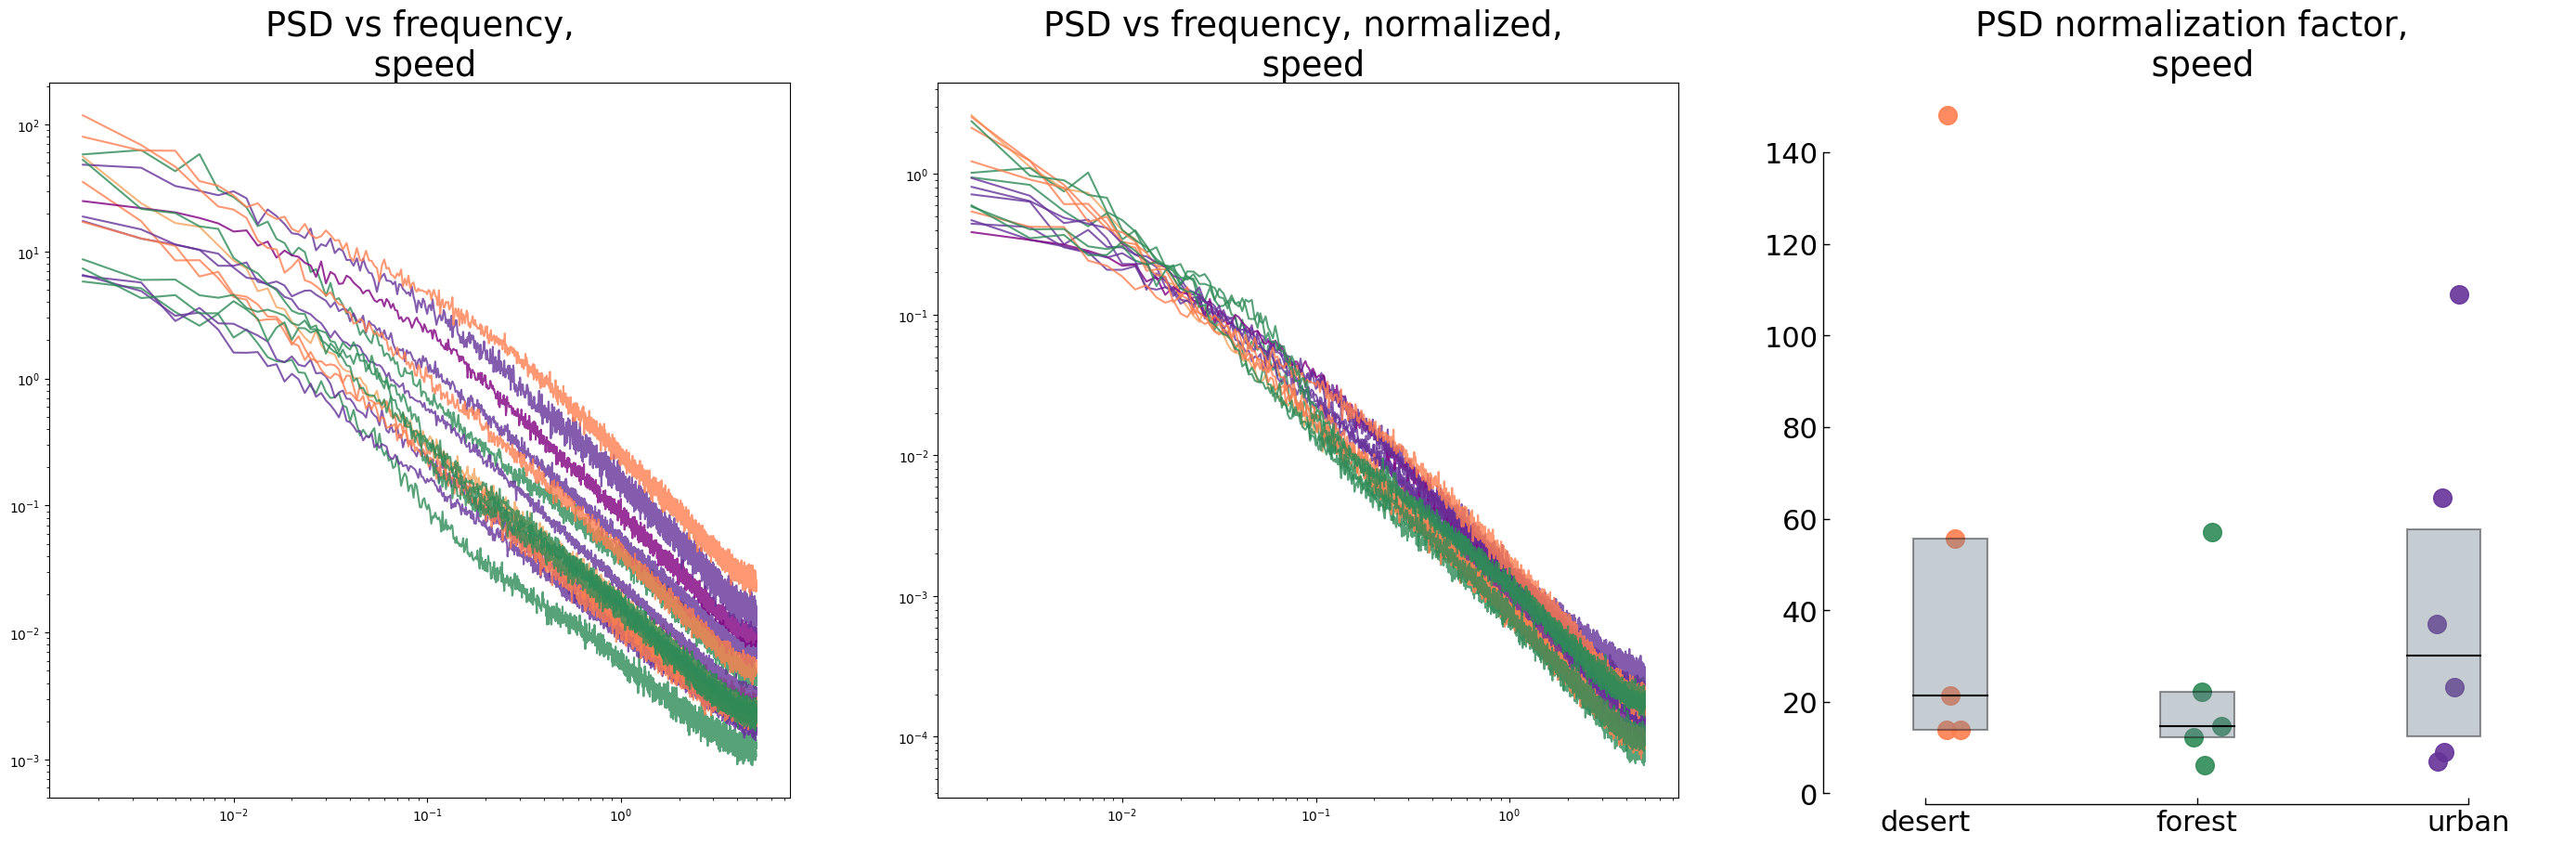

In [18]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(35, 10))
N=len(psd)
j=0

mpl.rcParams.update({'font.size': 22})
color=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax[j].loglog(freq[i], psd[i], color=color[i], label=dates[i], alpha=.8)
    ax[j+1].loglog(freq[i], psd[i]/delta_power[i], color=color[i], label=dates[i], alpha=.8)

    
    
ax[0].set_title('PSD vs frequency,\n speed')
ax[1].set_title('PSD vs frequency, normalized, \n speed')
ax[2].set_title('PSD normalization factor, \n speed')

dummydf=pd.DataFrame(columns=('psd', 'environment'))
environment= ['desert', 'forest', 'urban', 'forest', 'urban', 'urban', 'desert', 'desert', 'urban', 'urban', 'urban', 'desert', 'desert', 'forest', 'forest' ,'forest']
dummydf['environment']=environment
dummydf['psd']=delta_power

group = 'time'
column = 'psd'
grouped = dummydf.groupby('environment')
boxprops = dict( linewidth=1.5, color='k')
capprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
whiskerprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
medianprops = dict(linestyle='-', linewidth=1.5, color='k')

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
    
im=ax[2].boxplot(vals, widths=.3, patch_artist=True, showfliers=False, labels=['desert', 'forest', 'urban'], boxprops=boxprops, capprops=capprops, whiskerprops=whiskerprops, medianprops=medianprops)
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)
c=['coral', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for x, val, c in zip(xs, vals, c):
    ax[2].scatter(x, val, c=c, alpha=0.9, s=200)
    
fifi.mpl_functions.adjust_spines(ax[2], ['left', 'bottom'],                                 
                                 xticks=[.9, 2, 3.1],
                                 yticks=[0,20,40,60,80,100,120,140],
                                 tick_length=5,
                                 spine_locations={'left': 3, 'bottom': 5},
                                 linewidth=1)

colors=['slategrey', 'slategrey', 'slategrey']
for patch, color in zip(im['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)


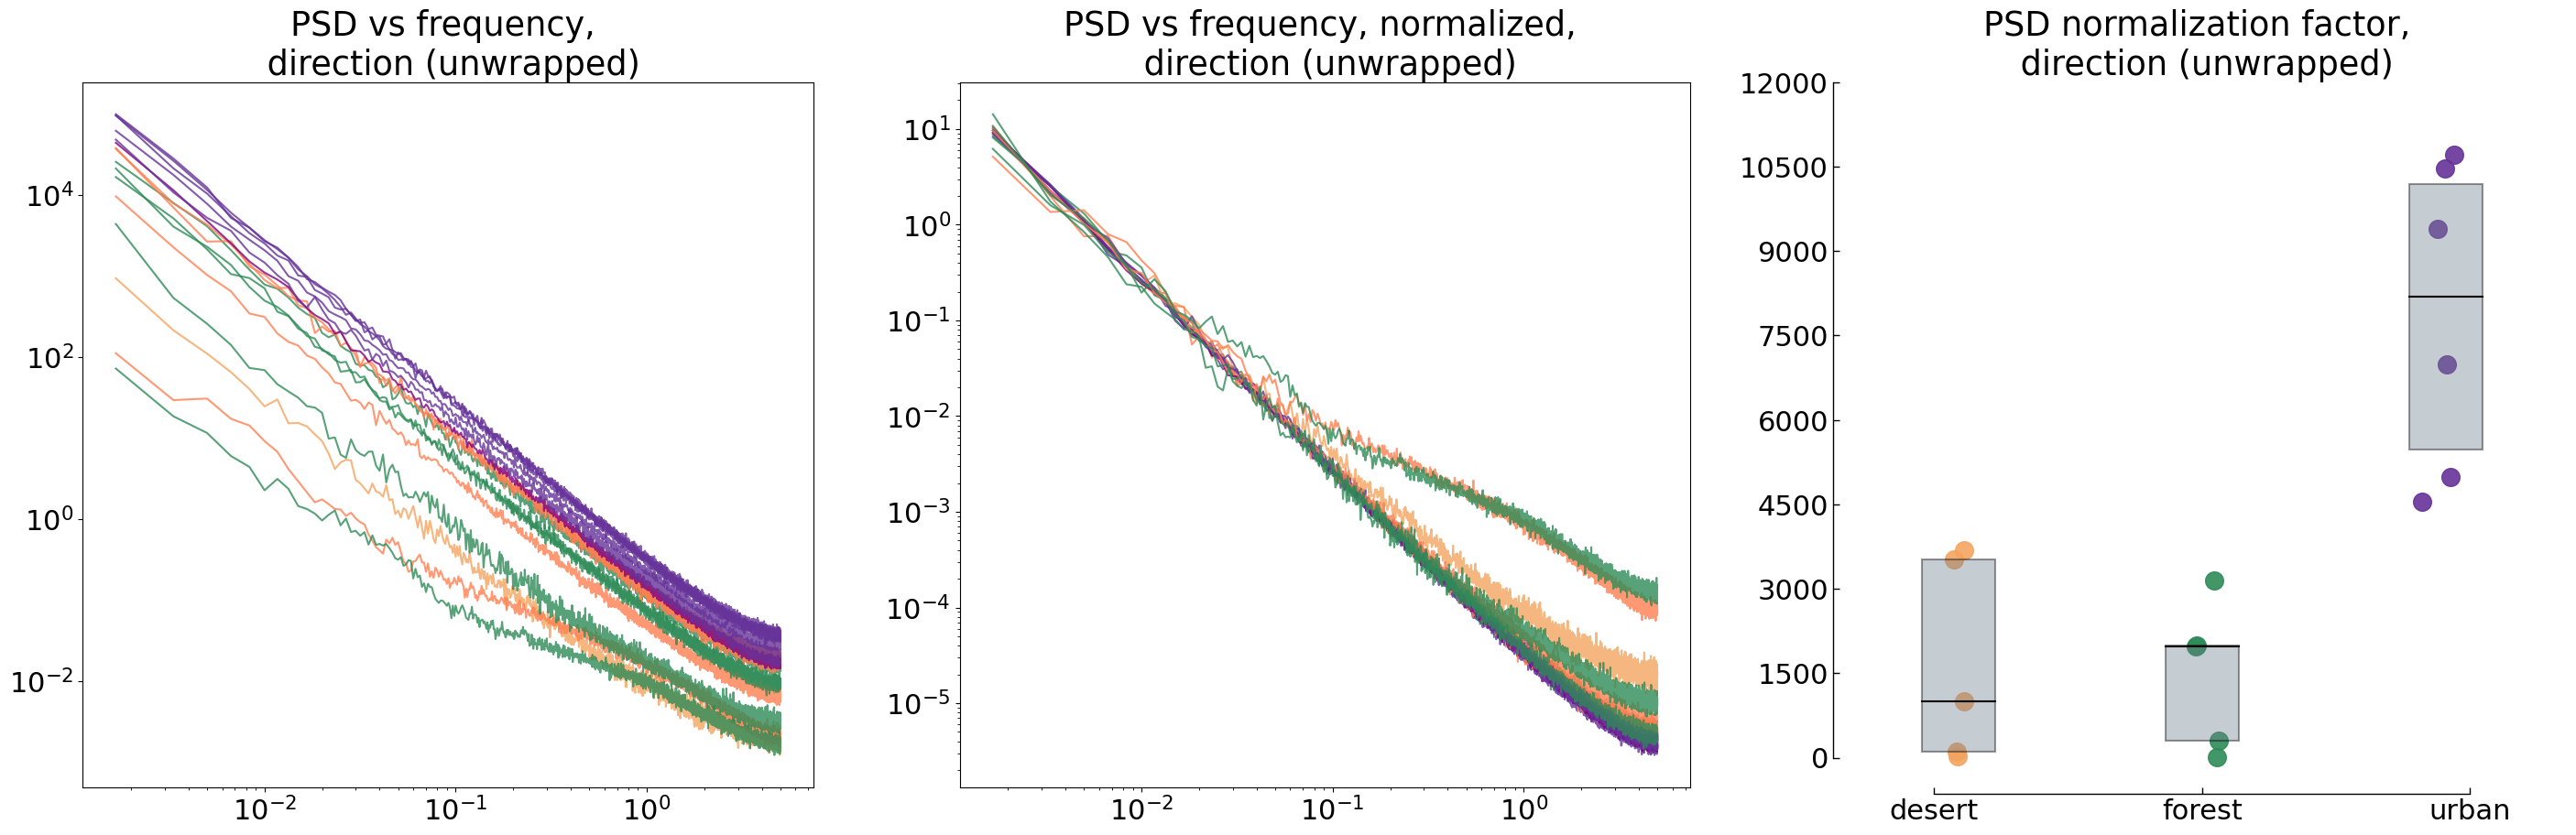

In [65]:
fig, ax =plt.subplots(nrows=1, ncols=3, figsize=(35, 10))
N=len(psd)
j=0
color=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']
mpl.rcParams.update({'font.size': 22})
for i in range(0,N):

    ax[j].loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], alpha=.8)
    ax[j+1].loglog(freq_D[i], psd_D[i]/delta_power_d[i], color=color[i], label=dates[i], alpha=.8)

    
ax[0].set_title('PSD vs frequency, \n direction (unwrapped)')

#ax[1].legend(bbox_to_anchor=(2.7,1))
ax[1].set_title('PSD vs frequency, normalized, \n direction (unwrapped)')

#ax[2].set_ylim(0,11000)
ax[2].set_title('PSD normalization factor, \n direction (unwrapped)')

dummydf=pd.DataFrame(columns=('psd', 'environment'))
environment= ['desert', 'forest', 'urban', 'forest', 'urban', 'urban', 'desert', 'desert', 'urban', 'urban', 'urban', 'desert', 'desert', 'forest', 'forest' ,'forest']
dummydf['environment']=environment
dummydf['psd']=delta_power_d

group = 'time'
column = 'psd'
grouped = dummydf.groupby('environment')
boxprops = dict( linewidth=1.5, color='k')
capprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
whiskerprops = dict(linestyle='-', linewidth=1.5, color='Black', alpha=0)
medianprops = dict(linestyle='-', linewidth=1.5, color='k')

names, vals, xs = [], [] ,[]

for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
    
im=ax[2].boxplot(vals, widths=.3, patch_artist=True, labels=['desert', 'forest', 'urban'], boxprops=boxprops, capprops=capprops, whiskerprops=whiskerprops, medianprops=medianprops)
ngroup = len(vals)
clevels = np.linspace(0., 1., ngroup)

c=['sandybrown', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']
for x, val, c in zip(xs, vals, c):
    ax[2].scatter(x, val, c=c, alpha=0.9, s=200)

yticks=np.arange(0,13000,1500)    
fifi.mpl_functions.adjust_spines(ax[2], ['left', 'bottom'],                                 
                                 xticks=[.9, 2, 3.1],
                                 yticks=yticks,
                                 tick_length=5,
                                 spine_locations={'left': 3, 'bottom': 5},
                                 linewidth=1)

colors=['slategrey', 'slategrey', 'slategrey']
for patch, color in zip(im['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.4)


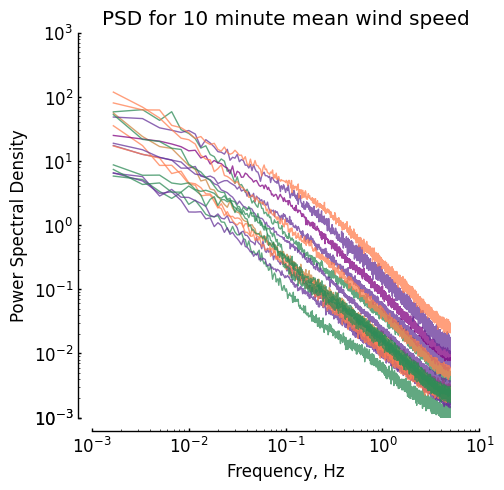

In [49]:
fig, ax =plt.subplots(figsize=(5,5))
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['peru', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax.loglog(freq[i], psd[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    
ax.set_title('PSD for 10 minute mean wind speed')
ax.set_ylabel('Power Spectral Density')
ax.set_xlabel('Frequency, Hz')
ax.set_ylim(.001,1000)
ax.set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax.tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax.spines.bottom.set_bounds((0.001, 10))
ax.spines.left.set_bounds((.001, 1000))

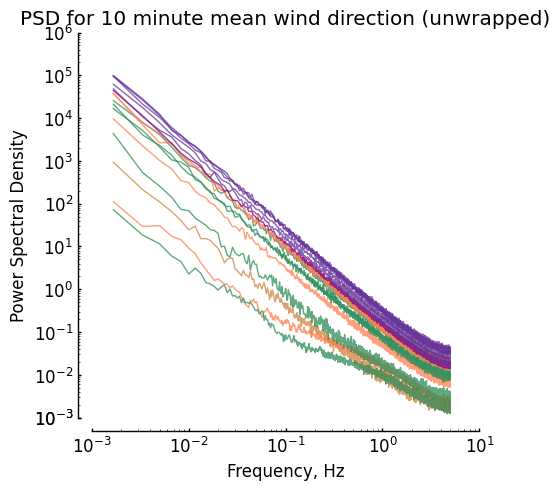

In [54]:
fig, ax =plt.subplots(figsize=(5,5))
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['peru', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'purple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax.loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    
ax.set_title('PSD for 10 minute mean wind direction (unwrapped)')
ax.set_ylabel('Power Spectral Density')
ax.set_xlabel('Frequency, Hz')
ax.set_ylim(.001,1000000)
ax.set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax.tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax.spines.bottom.set_bounds((0.001, 10))
ax.spines.left.set_bounds((.001, 1000000))

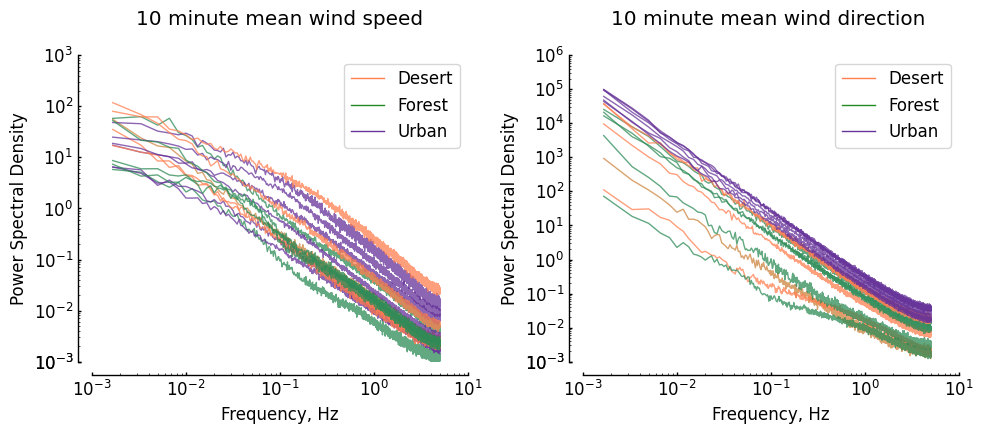

In [82]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,4.5), layout='tight')
N=len(psd)

mpl.rcParams.update({'font.size': 12})
color=['peru', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

for i in range(0,N):
    ax[0].loglog(freq[i], psd[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
    ax[1].loglog(freq_D[i], psd_D[i], color=color[i], label=dates[i], linewidth=1, alpha=.75)
        
ax[0].set_title('10 minute mean wind speed\n')
ax[0].set_ylabel('Power Spectral Density')
ax[0].set_xlabel('Frequency, Hz')
ax[0].set_ylim(.001,1000)
ax[0].set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax[0], ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[0].tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax[0].spines.bottom.set_bounds((0.001, 10))
ax[0].spines.left.set_bounds((.001, 1000))


ax[1].set_title('10 minute mean wind direction \n')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_xlabel('Frequency, Hz')
ax[1].set_ylim(.001,1000000)
ax[1].set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax[1], ['left', 'bottom'],
                                 yticks=[.001, .001, .01, .1, 1, 10, 100, 1000, 10000, 100000, 1000000],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=2.5,
                                 spine_locations={'left': 10, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[1].tick_params(which='minor', length=2.5*0.5, color='black', direction='in', width=0.5)
ax[1].spines.bottom.set_bounds((0.001, 10))
ax[1].spines.left.set_bounds((.001, 1000000))

legend_elements = [Line2D([0], [0], color='coral', lw=1, label='Desert'),
                   Line2D([0], [0], color='forestgreen', lw=1, label='Forest'),
                  Line2D([0], [0], color='rebeccapurple', lw=1, label='Urban')]

#make legend
ax[0].legend(handles=legend_elements)
ax[1].legend(handles=legend_elements)


#fig.savefig('psd_direction_speed.svg', format='svg')

In [ ]:
# for floris

In [19]:
dflam_30=pd.read_hdf('dflam_30.hdf')

In [20]:
dfturb_30=pd.read_hdf('dfturb_30.hdf')

In [43]:
wt_freq=np.empty((2, 0)).tolist()
wt_psd=np.empty((2, 0)).tolist()
wt_delta_power=np.empty((2, 0)).tolist()

wt_freq_D=np.empty((2, 0)).tolist()
wt_psd_D=np.empty((2, 0)).tolist()
wt_delta_power_d =np.empty((2, 0)).tolist()

In [44]:
wt_dfs_s2=[dflam_30.S2,dfturb_30.S2]
wt_dfs_d=[dflam_30.D,dfturb_30.D]    

In [45]:
N=len(wt_freq_D)

for i in range (0,N):
    wt_freq_D[i], wt_psd_D[i]= avg_psd(wt_dfs_d[i])

In [46]:
for i in range (0,N):
    wt_freq[i], wt_psd[i]= avg_psd(wt_dfs_s2[i])

In [47]:
for i in range (0,N):
    wt_delta_power[i] = scipy.integrate.simps(wt_psd[i], dx=.1)
    wt_delta_power_d[i] = scipy.integrate.simps(wt_psd_D[i], dx=.1)

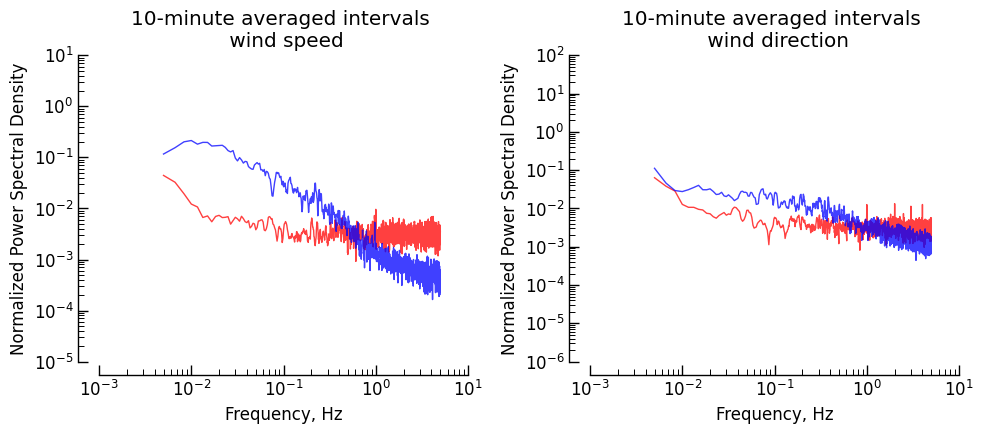

In [95]:
fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(10,4.5), layout='tight')
N=len(psd)

mpl.rcParams.update({'font.size': 12})
#color=['chocolate', 'seagreen', 'rebeccapurple', 'seagreen', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'rebeccapurple', 'rebeccapurple', 'rebeccapurple', 'coral', 'coral', 'seagreen', 'seagreen', 'seagreen']

#for i in range(0,N):
#    ax[0].loglog(freq[i], psd[i]/delta_power[i], color=color[i],linewidth=1, alpha=.75)
#    ax[1].loglog(freq_D[i], psd_D[i]/delta_power_d[i], color=color[i],  linewidth=1, alpha=.75)

types=['Laminar', 'Turbulent']
wtcolor=['red', 'blue']
for i in range(0,2):
    ax[0].loglog(wt_freq[i], wt_psd[i]/wt_delta_power[i], color=wtcolor[i],  linewidth=1, alpha=.75)
    ax[1].loglog(wt_freq_D[i], wt_psd_D[i]/wt_delta_power_d[i], color=wtcolor[i],  linewidth=1, alpha=.75)
        
    
    
    
ax[0].set_title('10-minute averaged intervals \n wind speed')
ax[0].set_ylabel('Normalized Power Spectral Density')
ax[0].set_xlabel('Frequency, Hz')
#ax[0].set_ylim(.001,1000)
ax[0].set_xlim(.001,10)

fifi.mpl_functions.adjust_spines(ax[0], ['left', 'bottom'],
                                 yticks=[.00001,.0001, .001, .01, .1, 1, 10],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=7,
                                 spine_locations={'left': 15, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[0].tick_params(which='minor', length=4.5, color='black', direction='in', width=.7)
ax[0].spines.bottom.set_bounds((0.001, 10))
ax[0].spines.left.set_bounds((.00001, 10))


ax[1].set_title('10-minute averaged intervals \n wind direction')
ax[1].set_ylabel('Normalized Power Spectral Density')
ax[1].set_xlabel('Frequency, Hz')
#ax[1].set_ylim(.001,1000000)
ax[1].set_xlim(.001,10)
fifi.mpl_functions.adjust_spines(ax[1], ['left', 'bottom'],
                                 yticks=[.000001,.00001,.0001, .001, .01, .1, 1, 10, 100],
                                 xticks=[.001, .01, .1, 1, 10],
                                 tick_length=7,
                                 spine_locations={'left': 15, 'bottom': 10},
                                 linewidth=1)
# fix the minor ticks and spine
ax[1].tick_params(which='minor', length=4.5, color='black', direction='in', width=.7)
ax[1].spines.bottom.set_bounds((0.001, 10))
ax[1].spines.left.set_bounds((.000001, 100))


#legend_elements = [Line2D([0], [0], color='chocolate', lw=2, label='Playa'),
                  # Line2D([0], [0], color='coral', lw=2, label='Steppe'),
                 #  Line2D([0], [0], color='forestgreen', lw=2, label='Forest'),
                 # Line2D([0], [0], color='rebeccapurple', lw=2, label='Urban')]
                  #Line2D([0], [0], color='red', lw=2, label='Laminar'),
                  #Line2D([0], [0], color='blue', lw=2, label='Turbulent')]

#make legend
#ax[0].legend(handles=legend_elements)
#ax[1].legend(handles=legend_elements, bbox_to_anchor=(1.3,1))








fig.savefig('psd_direction_speed_WTonly.svg' , bbox_inches='tight', format='svg')